In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\priyanka reddy\\Downloads\\liver.csv")

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [5]:
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [6]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [7]:
df.rename(columns={'Dataset':'Outcome'},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Outcome                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [8]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':2})

In [9]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
0,65,2,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [10]:
df = df.dropna()

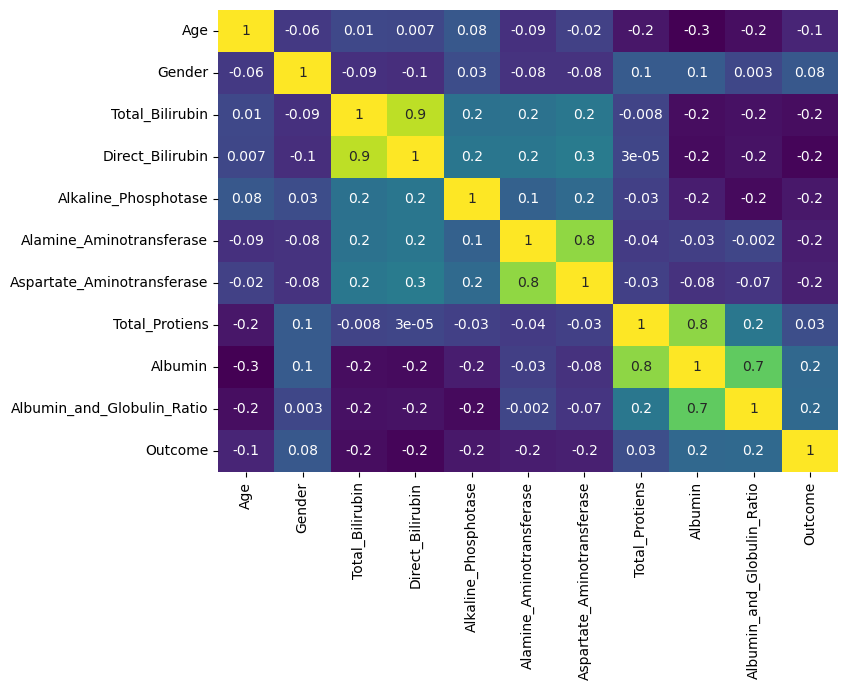

In [11]:
fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot = True, fmt='.1g',cmap="viridis",cbar=False);

In [12]:
print('Total Unhealthy Livers : {}'.format(df.Outcome.value_counts()[1]))
print('Total Healthy Livers : {}'.format(df.Outcome.value_counts()[2]))

Total Unhealthy Livers : 414
Total Healthy Livers : 165


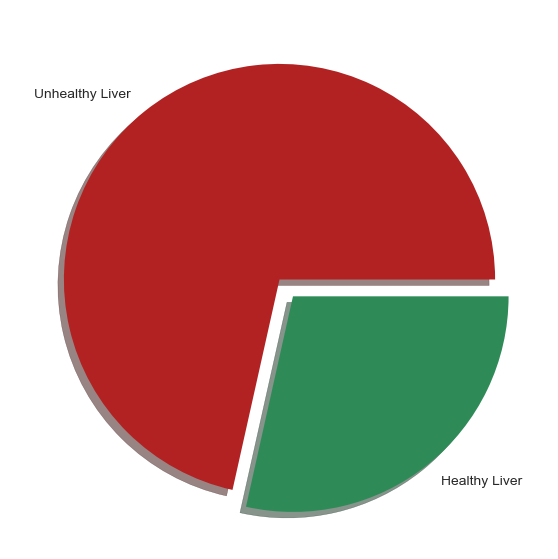

In [13]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(7,7))

plt.pie(x=df["Outcome"].value_counts(),
        colors=["firebrick","seagreen"],
        labels = ["Unhealthy Liver","Healthy Liver"],
        shadow = True,
        explode = (0,0.1)
        )

plt.show()


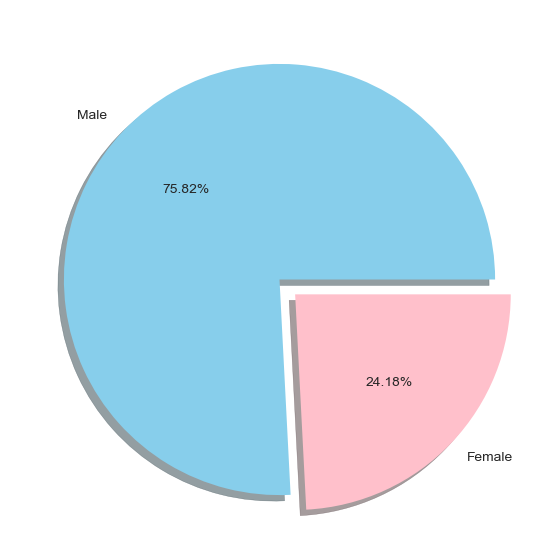

In [14]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(7,7))

plt.pie(x=df["Gender"].value_counts(),
        colors=["skyblue","pink"],
        labels = ["Male","Female"],
        shadow = True,
        autopct = "%1.2f%%",
        explode = (0,0.1)
        )

plt.show()

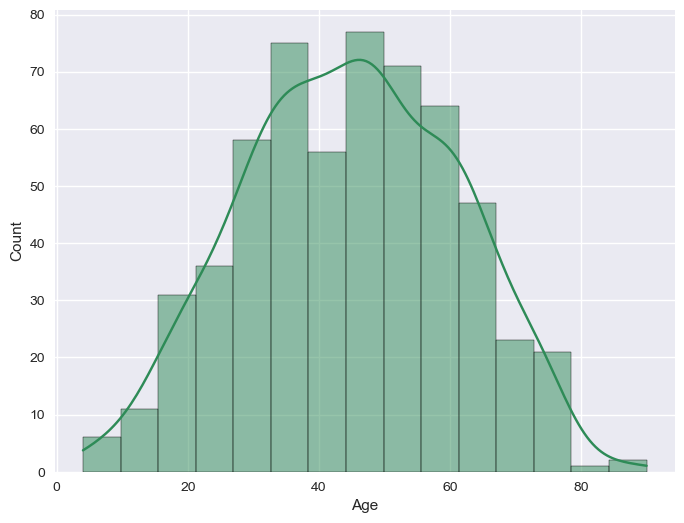

In [15]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(x=df["Age"],kde=True,color = "seagreen");

In [16]:
x = df.drop("Outcome", axis=1)
y = df["Outcome"]
print(x.columns)

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio'],
      dtype='object')


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [20]:
DecisionTreeClassifierScore = dtc.score(x_test,y_test)
print("Accuracy obtained by Decision Tree Classifier model:",DecisionTreeClassifierScore*100)


Accuracy obtained by Decision Tree Classifier model: 59.48275862068966


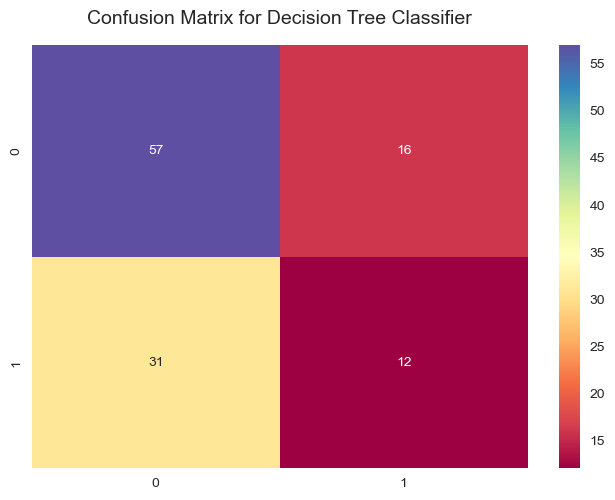

In [21]:
y_pred_dtc = dtc.predict(x_test)
cf_matrix = confusion_matrix(y_test,y_pred_dtc)
sns.heatmap(cf_matrix, annot = True, cmap="Spectral")
plt.title("Confusion Matrix for Decision Tree Classifier", fontsize=14,y = 1.03);

In [22]:
print(metrics.classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           1       0.65      0.78      0.71        73
           2       0.43      0.28      0.34        43

    accuracy                           0.59       116
   macro avg       0.54      0.53      0.52       116
weighted avg       0.57      0.59      0.57       116



# Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [24]:
RandomForestClassifierScore = rfc.score(x_test,y_test)
print("Accuracy obtained by Random Forest Classifier model:",RandomForestClassifierScore*100)


Accuracy obtained by Random Forest Classifier model: 65.51724137931035


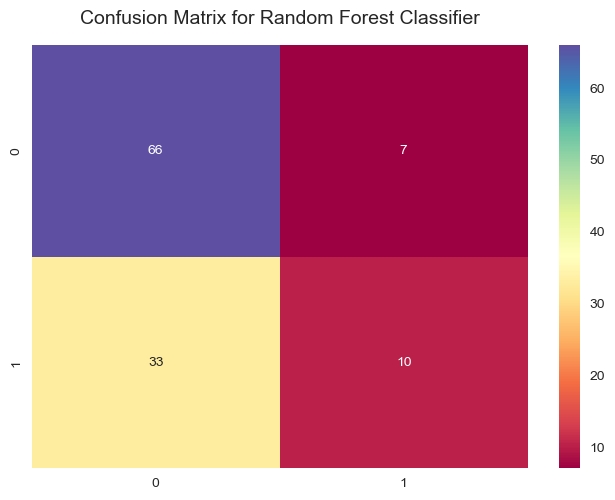

In [25]:
y_pred_rfc = rfc.predict(x_test)
cf_matrix = confusion_matrix(y_test,y_pred_rfc)
sns.heatmap(cf_matrix, annot = True, cmap="Spectral")
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14,y = 1.03);

In [26]:
print(metrics.classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           1       0.67      0.90      0.77        73
           2       0.59      0.23      0.33        43

    accuracy                           0.66       116
   macro avg       0.63      0.57      0.55       116
weighted avg       0.64      0.66      0.61       116



# K Neighbors Classifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [28]:
kNeighborsClassifierScore = knn.score(x_test, y_test)
print("Accuracy obtained by k Neighbors Classifier model:", kNeighborsClassifierScore * 100)


Accuracy obtained by k Neighbors Classifier model: 63.793103448275865


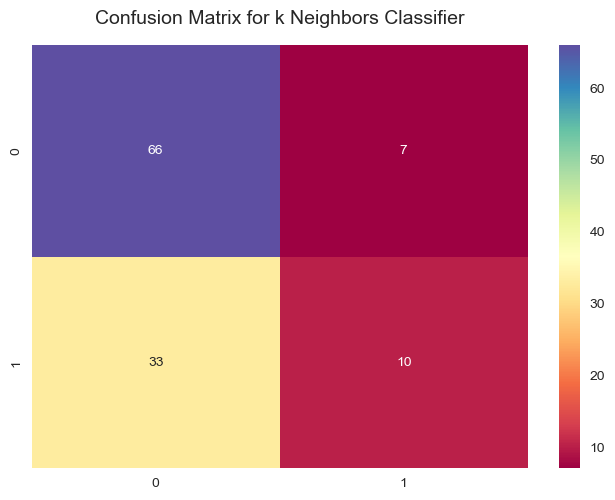

In [29]:
y_pred_knn = knn.predict(x_test)
cf_matrix = confusion_matrix(y_test,y_pred_rfc)
sns.heatmap(cf_matrix, annot = True, cmap="Spectral")
plt.title("Confusion Matrix for k Neighbors Classifier", fontsize=14,y = 1.03);

In [30]:
print(metrics.classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           1       0.65      0.92      0.76        73
           2       0.54      0.16      0.25        43

    accuracy                           0.64       116
   macro avg       0.59      0.54      0.51       116
weighted avg       0.61      0.64      0.57       116



# Gradient Boosting Classifier

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [32]:
GradientBoostingClassifierScore = gb.score(x_test,y_test)
print("Accuracy obtained by  Gradient Boosting Classifier model:",GradientBoostingClassifierScore*100)


Accuracy obtained by  Gradient Boosting Classifier model: 68.96551724137932


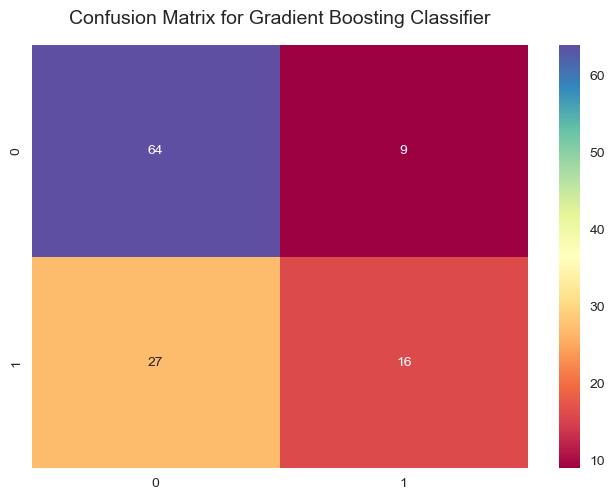

In [33]:
y_pred_gb = gb.predict(x_test)
cf_matrix = confusion_matrix(y_test,y_pred_gb)
sns.heatmap(cf_matrix, annot = True, cmap="Spectral")
plt.title("Confusion Matrix for Gradient Boosting Classifier", fontsize=14,y = 1.03);

In [34]:
print(metrics.classification_report(y_test,y_pred_gb))

              precision    recall  f1-score   support

           1       0.70      0.88      0.78        73
           2       0.64      0.37      0.47        43

    accuracy                           0.69       116
   macro avg       0.67      0.62      0.63       116
weighted avg       0.68      0.69      0.67       116



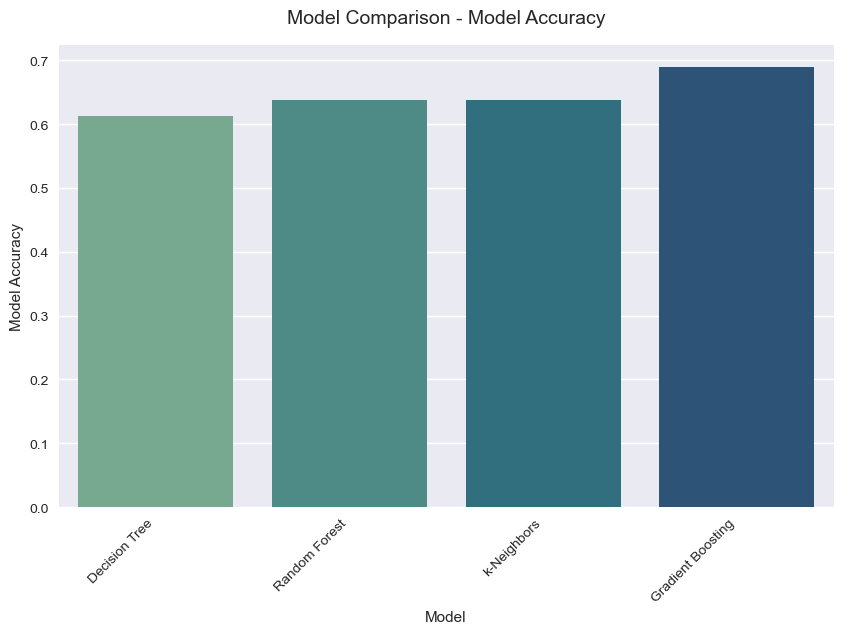

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


data = {
    'Model': ['Decision Tree', 'Random Forest', 'k-Neighbors', 'Gradient Boosting'],
    'Score': [0.612, 0.637, 0.637, 0.689]
}


df = pd.DataFrame(data)


plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', data=df, palette="crest")
plt.ylabel("Model Accuracy")
plt.title("Model Comparison - Model Accuracy", fontsize=14, y=1.03)
plt.xticks(rotation=45, ha='right')

plt.show()


In [36]:
gb_model = GradientBoostingClassifier(random_state=12345)
gb_model.fit(x_train, y_train)

GradientBoostingClassifier(random_state=12345)

In [37]:
models = pd.DataFrame({
    'Model' : ['Decision Tree', 'Random Forest', 'k-Neighbors', 'Gradient Boosting'],
    'Score' : [0.594, 0.655, 0.637, 0.689]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Gradient Boosting,0.689
1,Random Forest,0.655
2,k-Neighbors,0.637
0,Decision Tree,0.594


In [38]:
import pickle

In [39]:
with open('liver.pkl', 'wb') as f:
    pickle.dump(gb_model,f)